# XGBoost based Binary Classification

## Required Libraries

In [0]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, auc, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Load Data

In [0]:
from databricks.feature_store import FeatureStoreClient

fs = FeatureStoreClient()

tx_features_df = fs.read_table(
  name='xgboost_model.tx_features'
)

In [0]:
txns = tx_features_df.toPandas()
txns.head()

Out[3]:

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_152100,0,6.7971,1.8586,6.5413,7.4050,14.2702,-16.0083,4.1009,15.9394,-4.1760,6.7061,8.1452,3.8204,14.1109,1.6864,4.6928,14.6374,8.1820,-2.3889,8.4698,8.1489,8.3218,5.6803,7.5578,1.7681,14.1942,13.9070,-5.6330,-0.3907,4.7825,4.4434,-8.4399,10.4210,-0.0378,19.7144,10.7808,8.6446,5.5915,2.5613,...,22.8423,5.1359,4.7400,6.8225,0.0545,15.5785,3.2425,-18.8560,8.4830,5.8048,1.7830,-6.3145,7.2562,-6.0627,27.8708,11.6614,13.8639,11.4236,-12.1936,0.1004,-4.1067,10.3192,-5.5312,8.7232,18.4985,-2.9903,12.3751,-7.6352,14.5056,0.4118,7.2917,4.7009,2.4130,5.1350,21.7212,-0.5692,6.5311,7.3511,23.3783,-7.7925
1,train_152101,0,14.0471,-5.9247,13.7132,8.8073,12.3217,-1.3380,5.1676,18.7181,3.3754,5.9937,-0.2217,-7.4851,14.0275,10.7306,4.2861,14.7179,8.0765,-18.3019,9.6686,17.9299,13.0714,17.5992,1.8243,2.8367,10.7474,13.7768,-8.7088,-0.1026,6.4296,2.9135,-11.2248,10.2442,1.6960,20.6586,11.9476,3.9322,5.2173,7.3174,...,13.4540,5.8755,7.6967,15.6306,2.3341,16.3425,3.1187,-10.4065,10.2799,6.1046,-2.1820,-3.1940,16.3828,6.7280,22.5399,12.0966,-4.2466,10.8518,2.1955,3.3326,-5.7038,12.0240,-11.3605,4.1095,20.5448,-12.3355,4.5085,-7.9755,15.8290,1.0185,3.7342,4.7834,1.9226,5.5908,21.3138,1.4643,-5.4017,9.3107,15.7057,-7.4594
2,train_152102,0,13.0980,-2.3907,5.6238,6.4624,10.2951,8.1811,5.6370,21.0058,0.9966,5.4489,-7.4497,-9.9448,13.8338,9.9051,6.1259,14.4857,11.3457,-3.9109,14.4083,5.2379,14.6105,8.5538,9.4191,2.1560,2.8191,13.3315,2.8898,-1.0793,6.0019,7.6968,-0.6489,12.7344,-3.8565,19.4802,11.3870,9.7682,0.1362,4.0701,...,36.7407,5.7453,5.9565,13.4355,0.3781,16.7674,3.3255,-8.7720,2.3183,5.5808,2.1943,-0.4050,8.3723,3.7572,36.5280,8.2851,-5.2319,12.8677,13.3999,5.5087,-13.8993,9.4591,-1.2888,12.7447,21.4243,-9.4641,12.0819,-16.8078,21.0466,-1.9561,5.0580,6.2276,0.2651,6.7491,19.2248,-0.0287,3.7644,7.3127,18.8722,-9.8589
3,train_152103,0,4.0701,-4.9470,6.4675,6.8292,10.7205,-12.2408,5.7061,21.9174,-2.1273,6.0051,-5.7798,1.1757,14.2293,10.9783,4.3916,14.5366,9.4724,-15.5812,15.8638,14.2118,3.1517,27.8779,8.5360,4.0988,13.6436,13.3785,-9.5788,-3.2071,5.0158,3.5808,-0.1456,13.2558,-1.5834,20.0639,11.0195,0.3251,3.8103,7.2500,...,10.9854,5.6941,5.4944,8.8625,-12.5623,17.1849,3.0231,-6.7418,2.8119,5.4622,2.7960,-4.6166,8.6339,-5.6080,28.9557,12.4635,2.1973,12.1480,-0.5060,2.4814,3.7975,7.8639,-3.9875,14.1944,15.5902,-6.5403,11.5675,-26.6992,12.0500,0.7717,6.0220,8.5309,0.9386,3.3686,16.8450,-1.4648,3.2577,8.4771,18.4435,-1.3084
4,train_152104,0,8.8336,-1.8388,13.6535,6.9038,11.0097,6.5183,6.0238,15.2613,1.6549,7.9097,-10.5294,-6.8656,14.1334,2.3019,8.5244,14.8914,10.7798,4.6586,12.8776,16.3736,16.4588,26.8363,10.3472,3.8828,8.1742,14.0835,-2.1359,-3.2198,5.8646,3.6035,-2.9243,8.2595,-4.7766,6.3554,11.9001,1.1838,9.0072,1.9598,...,8.6021,5.6101,6.4583,17.9525,-0.5438,28.4528,2.1477,-2.0249,2.7177,5.7859,1.1672,-5.2197,20.6412,-4.9074,24.4981,12.9178,7.5326,6.9034,6.4220,8.3428,-0.5635,10.8132,-5.6138,0.8506,17.2580,-7.4415,6.6058,-21.3627,11.9941,-0.0984,2.2827,8.2459,4.1707,2.8563,21.6697,1.9989,7.2818,8.4302,20.4793,-18.8556


## PreProcessing Data

### SMOTE - Minority Oversampling

Out[4]:

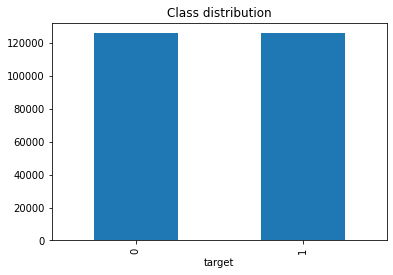

[]

In [0]:
over = SMOTE(sampling_strategy=0.7, random_state=11, k_neighbors=7)
under = RandomUnderSampler(sampling_strategy=1, random_state=11)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y = pipeline.fit_resample(txns.drop(columns=['ID_code','target']), txns['target'])

# Check the class distribution
pd.concat([X, y], axis=1).pivot_table(index='target', aggfunc='size').plot(kind='bar', title = 'Class distribution').plot()

### Split Train & Test Data

In [0]:
# Split the data into training and test set with a ration of 0.7:0.3 with a constant random
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

## Model - Train, Fit & Evaluate

In [0]:
import mlflow
import mlflow.xgboost
from mlflow.models.signature import infer_signature
from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK
from hyperopt.pyll import scope
from math import exp

search_space = {
  'objective': 'binary:logistic',
  'tree_method': 'gpu_hist',
  'seed': 11,
  'max_depth': scope.int(hp.quniform('max_depth', 5, 20, 1)),
  'learning_rate': hp.loguniform('learning_rate', -3, 0),
  'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
  'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
  'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
  'subsample': hp.uniform('subsample', 0.4, 1.0),
  'n_estimators': scope.int(hp.quniform('n_estimators', 100, 400, 50)),
  'gamma': hp.loguniform('gamma', 0, 0.3)
}

def train_model(params):
    mlflow.xgboost.autolog()
    with mlflow.start_run(nested=True):
        train = xgb.DMatrix(data=X_train, label=y_train)
        test = xgb.DMatrix(data=X_test, label=y_test)
        
        xgbm = xgb.train(params=params, 
                            dtrain=train, 
                            num_boost_round=1000,
                            evals=[(test, "test")], 
                            early_stopping_rounds=50)
        
        y_pred = xgbm.predict(test)
        
        auc_score = roc_auc_score(y_test, y_pred)
        mlflow.log_metric('auc', auc_score)
        
        signature = infer_signature(X_train, xgbm.predict(train))
        mlflow.xgboost.log_model(xgbm, "model", signature=signature)
        
        # Set the loss to -1*auc_score so fmin maximizes the auc_score
        return {'status': STATUS_OK, 'loss': -1*auc_score, 'booster': xgbm.attributes()}
 
spark_trials = SparkTrials(parallelism=10)

with mlflow.start_run(run_name='xgboost_classification'):
  best_params = fmin(
    fn=train_model, 
    space=search_space,
    algo=tpe.suggest,
    max_evals=100,
    trials=spark_trials,
  )

Hyperopt with SparkTrials will automatically track trials in MLflow. To view the MLflow experiment associated with the notebook, click the 'Runs' icon in the notebook context bar on the upper right. There, you can view all runs.
To view logs from trials, please check the Spark executor logs. To view executor logs, expand 'Spark Jobs' above until you see the (i) icon next to the stage from the trial job. Click it and find the list of tasks. Click the 'stderr' link for a task to view trial logs.
 0%| | 0/100 [00:00<?, ?trial/s, best loss=?] 1%| | 1/100 [01:14<2:02:47, 74.42s/trial, best loss: -0.958064866555014] 2%|▏ | 2/100 [01:20<55:54, 34.23s/trial, best loss: -0.9743750332085039]  3%|▎ | 3/100 [01:44<47:51, 29.61s/trial, best loss: -0.9797528839555938] 4%|▍ | 4/100 [01:52<33:44, 21.09s/trial, best loss: -0.9797528839555938] 5%|▌ | 5/100 [02:17<35:38, 22.51s/trial, best loss: -0.9797528839555938] 6%|▌ | 6/100 [02:24<26:45, 17.08s/trial, best loss: -0.9822190792837981] 7%|▋ | 7/100 [02:37<24:25, 15.75s/trial, best loss: -0.9822190792837981] 8%|▊ | 8/100 [02:52<23:55, 15.60s/trial, best loss: -0.9822190792837981] 9%|▉ | 9/100 [03:02<21:01, 13.86s/trial, best loss: -0.9822190792837981] 10%|█ | 10/100 [03:07<16:41, 11.13s/trial, best loss: -0.9822190792837981] 11%|█ | 11/100 [03:16<15:33, 10.49s/trial, best loss: -0.9822190792837981] 12%|█▏ | 12/100 [03:26<15:10, 10.35s/trial, best loss: -0.9822190792837981] 13%|█▎ | 13/100 [03:31<12:40, 8.74s/trial, best loss: -0.9822190792837981] 14%|█▍ | 14/100 [03:54<18:43, 13.06s/trial, best loss: -0.9822190792837981] 15%|█▌ | 15/100 [03:57<14:14, 10.05s/trial, best loss: -0.9822190792837981] 16%|█▌ | 16/100 [04:15<17:29, 12.50s/trial, best loss: -0.9822190792837981] 17%|█▋ | 17/100 [04:19<13:30, 9.77s/trial, best loss: -0.9822190792837981] 18%|█▊ | 18/100 [05:16<32:50, 24.03s/trial, best loss: -0.9824937295092186] 19%|█▉ | 19/100 [05:20<24:20, 18.03s/trial, best loss: -0.9824937295092186] 20%|██ | 20/100 [05:33<22:02, 16.54s/trial, best loss: -0.9824937295092186] 21%|██ | 21/100 [05:52<22:46, 17.29s/trial, best loss: -0.9824937295092186] 22%|██▏ | 22/100 [06:30<30:35, 23.53s/trial, best loss: -0.9824937295092186] 23%|██▎ | 23/100 [06:40<24:39, 19.22s/trial, best loss: -0.9826384676113742] 24%|██▍ | 24/100 [06:44<18:34, 14.67s/trial, best loss: -0.9826384676113742] 25%|██▌ | 25/100 [06:50<15:13, 12.18s/trial, best loss: -0.9826384676113742] 26%|██▌ | 26/100 [07:23<22:47, 18.48s/trial, best loss: -0.9826384676113742] 27%|██▋ | 27/100 [07:39<21:36, 17.75s/trial, best loss: -0.9826384676113742] 28%|██▊ | 28/100 [07:50<18:53, 15.74s/trial, best loss: -0.9826384676113742] 29%|██▉ | 29/100 [08:17<22:40, 19.16s/trial, best loss: -0.982730699227961]  30%|███ | 30/100 [08:27<19:09, 16.43s/trial, best loss: -0.982730699227961] 31%|███ | 31/100 [08:35<15:59, 13.91s/trial, best loss: -0.982730699227961] 32%|███▏ | 32/100 [08:59<18:52, 16.66s/trial, best loss: -0.982730699227961] 33%|███▎ | 33/100 [09:31<23:45, 21.28s/trial, best loss: -0.982730699227961] 34%|███▍ | 34/100 [09:34<17:25, 15.85s/trial, best loss: -0.9839905672468292] 35%|███▌ | 35/100 [09:57<19:31, 18.02s/trial, best loss: -0.9839905672468292] 37%|███▋ | 37/100 [10:02<11:28, 10.94s/trial, best loss: -0.9839905672468292] 39%|███▉ | 39/100 [10:45<15:15, 15.01s/trial, best loss: -0.9839905672468292] 40%|████ | 40/100 [11:01<15:15, 15.26s/trial, best loss: -0.9839905672468292] 41%|████ | 41/100 [11:11<13:46, 14.01s/trial, best loss: -0.9839905672468292] 42%|████▏ | 42/100 [11:45<18:29, 19.14s/trial, best loss: -0.9839905672468292] 43%|████▎ | 43/100 [12:03<17:54, 18.85s/trial, best loss: -0.9839905672468292] 44%|████▍ | 44/100 [12:08<14:02, 15.05s/trial, best loss: -0.9839905672468292] 45%|████▌ | 45/100 [12:23<13:52, 15.14s/trial, best loss: -0.9839905672468292] 46%|████▌ | 46/100 [12:35<12:49, 14.26s/trial, best loss: -0.9839905672468292] 47%|████▋ | 47/100 [13:29<22:36, 25.59s/trial, best loss: 

### Best Model from Run

In [0]:
model = mlflow.search_runs(order_by=['metrics.auc DESC']).iloc[0]


## Register the Best Model

In [0]:
import time

model_name = 'transaction_classification'
model_version = mlflow.register_model(f"runs:/{model.run_id}/model", model_name)
 
# Registering the model takes a few seconds, so add a small delay
time.sleep(15)


Registered model 'transaction_classification' already exists. Creating a new version of this model...
2022/04/09 00:51:06 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: transaction_classification, version 10
Created version '10' of model 'transaction_classification'.

## Metrics

In [0]:
test = xgb.DMatrix(data=X_test, label=y_test)
model = mlflow.xgboost.load_model(f"runs:/{model.run_id}/model")

y_score = model.predict(test)
y_pred = list(map(lambda pred: 1 if pred > 0.5 else 0, y_score))

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, pos_label=1))
print("Recall: ", recall_score(y_test, y_pred, pos_label=1))
print("F1-Score: ", f1_score(y_test, y_pred, pos_label=1))

Accuracy: 0.9458039412909117
Precision: 0.9568997906714616
Recall: 0.9347489841394678
F1-Score: 0.9456946967788137

## Visualize

### Confusion Matrix, ROC Curve, Precision Recall Curve

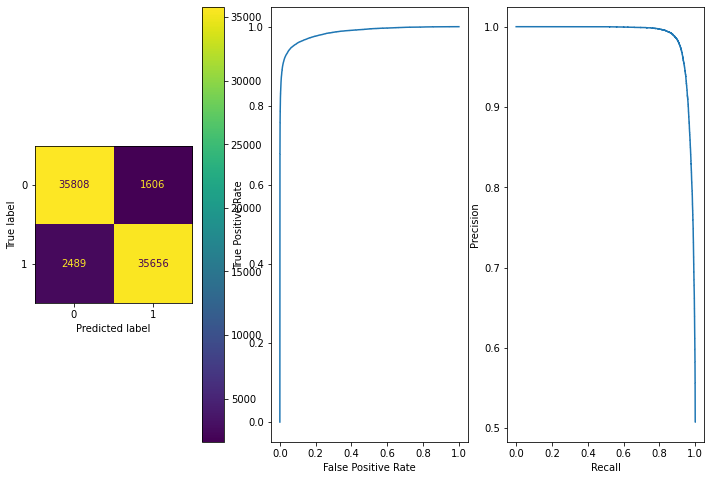

In [0]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Precision-Recall Curve
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

cm_display.plot(ax=ax1)
roc_display.plot(ax=ax2)
pr_display.plot(ax=ax3)
plt.show()

###  Feature Importance Plot

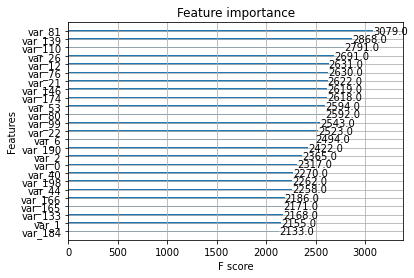

In [0]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model, max_num_features=25)
plt.show()

## Promote the Model

In [0]:
from mlflow.tracking import MlflowClient
 
client = MlflowClient()

client.transition_model_version_stage(
  name=model_name,
  version=model_version.version,
  stage="Production"
)

Out[12]: <ModelVersion: creation_timestamp=1649465466784, current_stage='Production', description='', last_updated_timestamp=1649465494603, name='transaction_classification', run_id='0a4752edca904e04887bf215237915d4', run_link='', source='dbfs:/databricks/mlflow-tracking/3478633130765323/0a4752edca904e04887bf215237915d4/artifacts/model', status='READY', status_message='', tags={}, user_id='5658425849968991', version='10'>